# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [15]:
import sys
!{sys.executable} -m pip install qmsolve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

### Q1. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.

#### In quantum mechanics, the Hamiltonian of a system is an operator corresponding to the total energy of a particular system, including both kinetic and potential energy. It is commonly expressed as:\begin{equation}
\hat{H} = \hat{T} + \hat{V}
\end{equation} It's a central concept used to describe the dynamics of quantum systems and is essential in formulating the Schrödinger equation and determining the system's possible states and associated energies.

Sources: 
- https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)
- https://physicscourses.colorado.edu/phys5250/phys5250_fa19/lecture/lec07-hamiltonian/

### Q2. Which force law is defined in the function harmonic_oscillator() in cell 2 of this notebook?

#### The force law defined in the function harmonic_oscillator() is that of Hooke's law: \begin{equation}
F = -kx
\end{equation} where "particle.x" represents the displacement of the particle from its equilibrium position.

### Q3. What are the eigenstates referred to in lines 22 and 23 in 1D_harmonic_oscillator.py? Again, please use multiple sources to formulate your answer and cite those sources.
####  An eigenstate is a quantum state which has a definite value for some physical property. Eigenstates can be compared to energy levels in the sense that they have a single value that is definite, and known. In this case, line 22 and 23 is printing the definite values of energy levels which the particle in the system can occupy. 

Sources:
- https://physics.stackexchange.com/questions/485299/what-are-the-eigenstates-and-eigenvalues
- https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Introductory_Quantum_Mechanics_(Fitzpatrick)/03%3A_Fundamentals_of_Quantum_Mechanics/3.08%3A_Eigenstates_and_Eigenvalues#:~:text=These%20special%20wavefunctions%20are%20called%20eigenstates%2C%20and%20the,eigenstate%20of%20A%20corresponding%20to%20the%20eigenvalue%20a.

Computing...
Took 0.004127979278564453
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


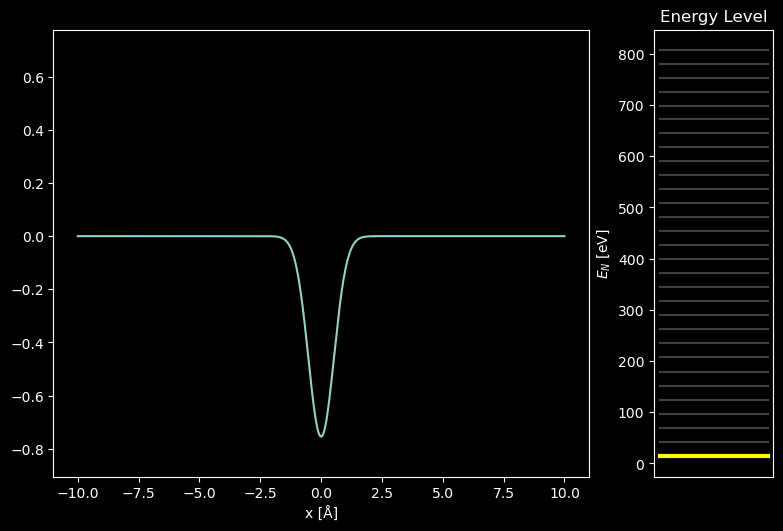

In [11]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

### Q4. Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.

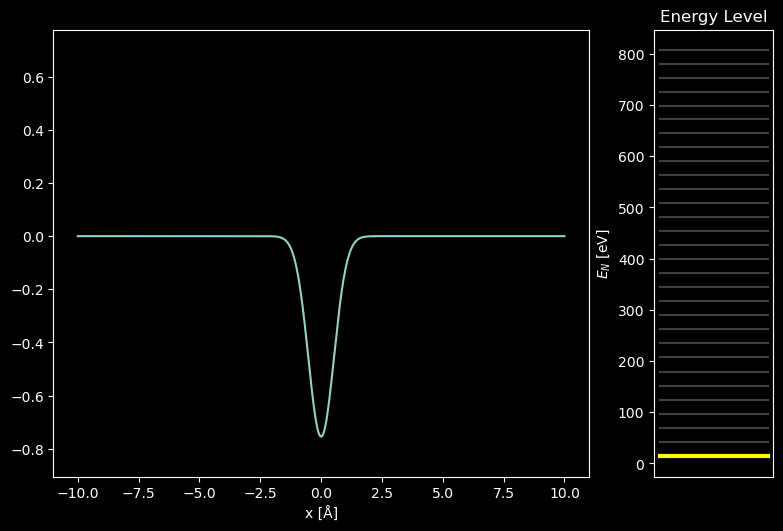

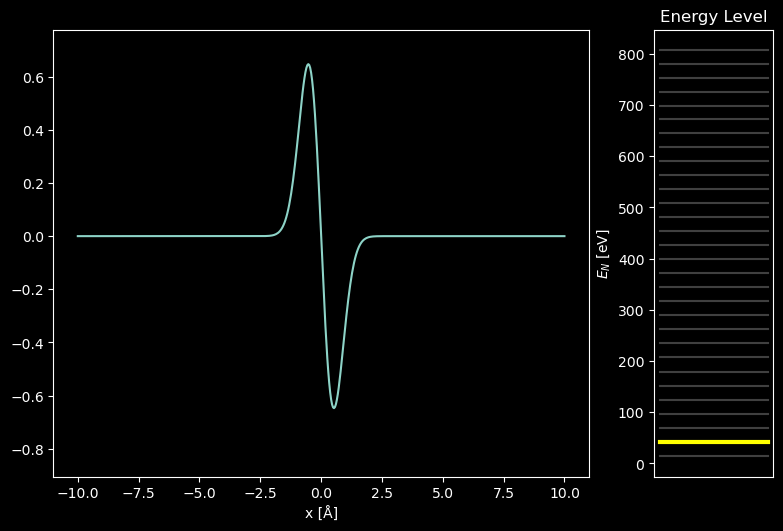

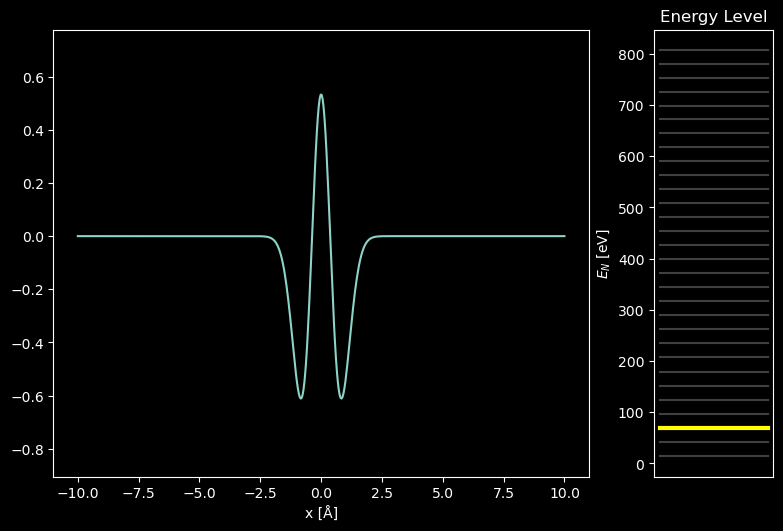

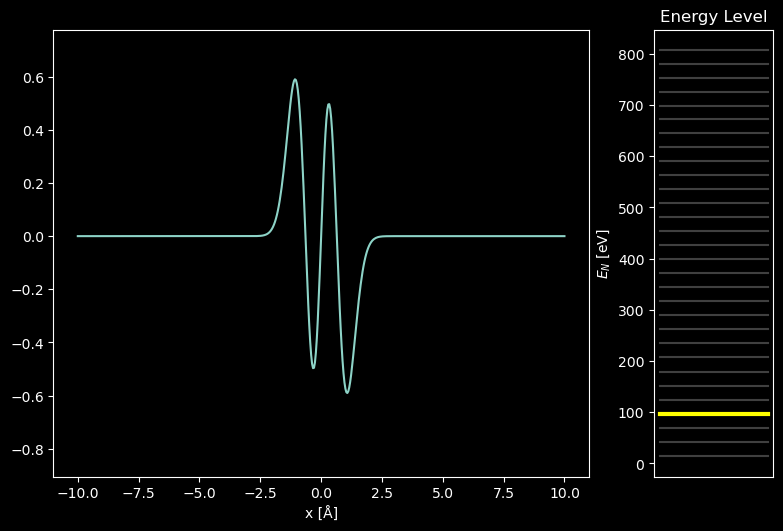

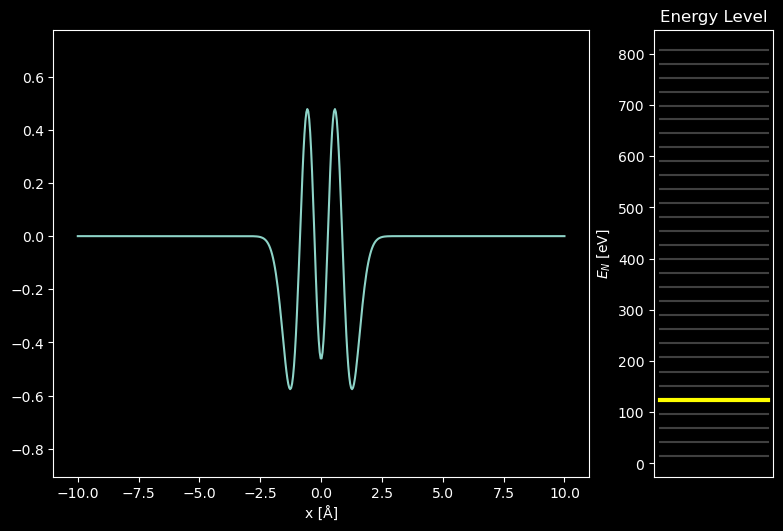

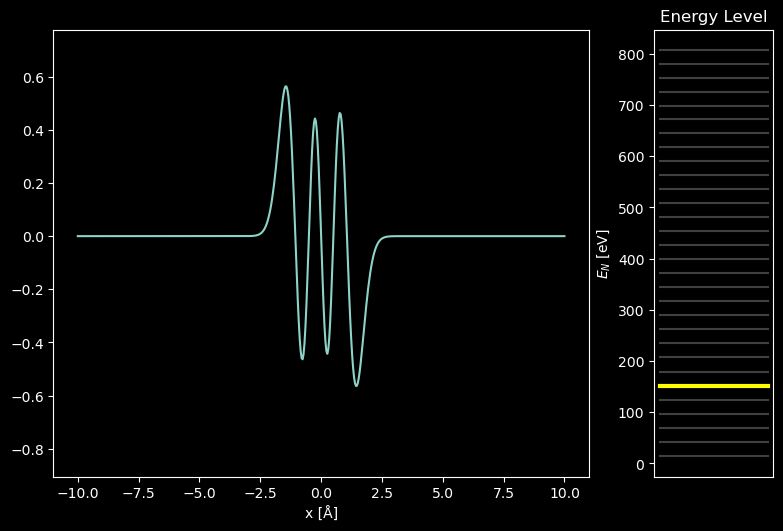

In [22]:
visualization.plot_eigenstate(0)
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(5)

### Q5. What is on the x axis of your plots?
#### On the x axis is Angstroms (Å) which is another unit of length, equal to one hundred-millionth of a centimeter, used mainly to express wavelengths and interatomic distances. In this case, it is used to express the wavelength of the probablities for each of the SHO eigenstates.

### Q6. Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?
#### The plots are showing the wave functions - $\psi(x)$. This is proven by the fact that the plots display negative amplitudes. Given a probability cannot be negative, this would point to the fact that these plots are the wavefunctions.

Computing...
Took 0.01563549041748047
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


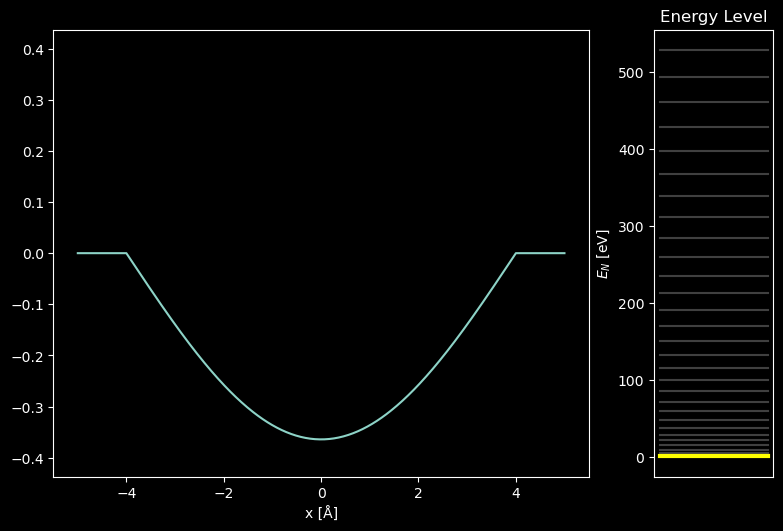

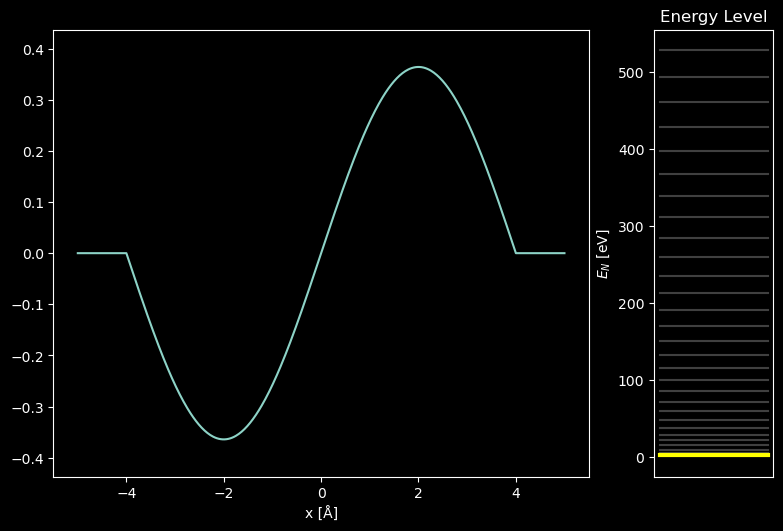

In [13]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

### Q7. Plot any three infinite square well eigenstates of your choice.

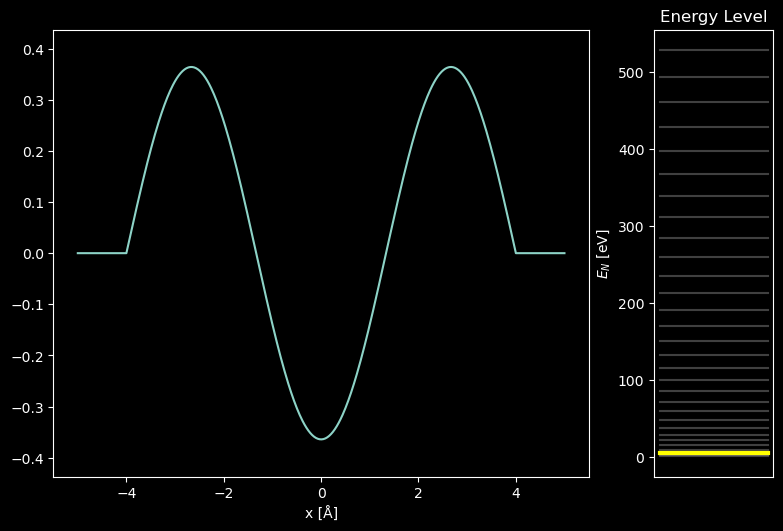

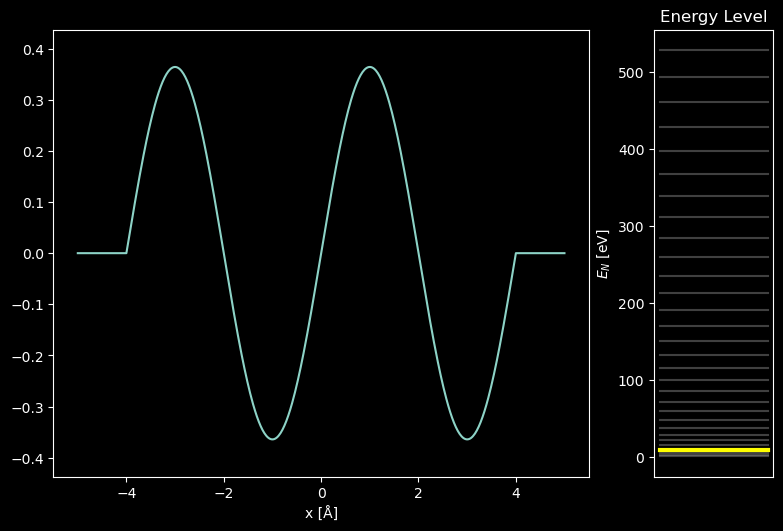

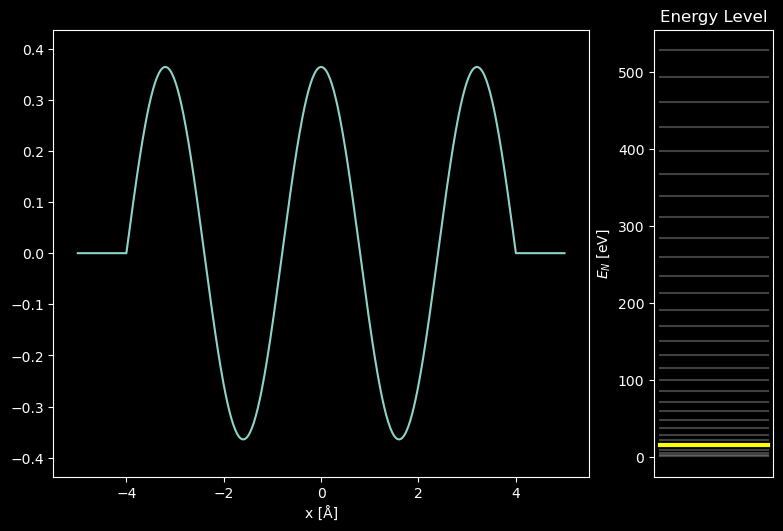

In [14]:
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(4)

### Q8. What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)
#### The eigenstates for the infinite square well look like they are discontinous at +4/-4 Å.This makes sense, as outside of the square well, the potential is infinite. 

### Q9. What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?
#### The relationship goes: number of extrema = quantum number + 1 


## Now it's your turn to define a potential

### Q10. Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.

Computing...
Took 0.01601696014404297
[  0.54528443   2.18075568   4.90524932   8.7167608   13.61234074
  19.58792754  26.63809002  34.75563201  43.93097187  54.15113225
  65.398008    77.64518713  90.85158163 104.94714678 119.79594239
 135.08300771 149.9290003  162.21899535 171.40045768 181.90339124
 196.69244515 214.01558192 232.04676302 249.73479549 266.68099454
 283.60182472 301.84184986 322.06260187 343.97215377 366.94211691]


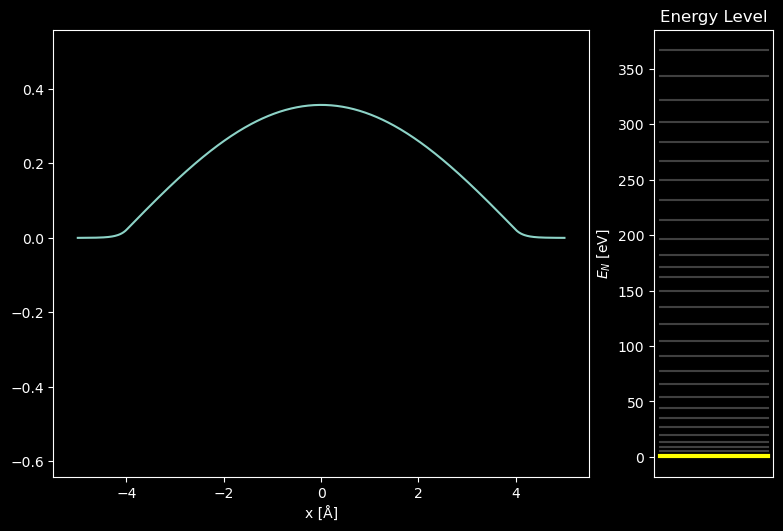

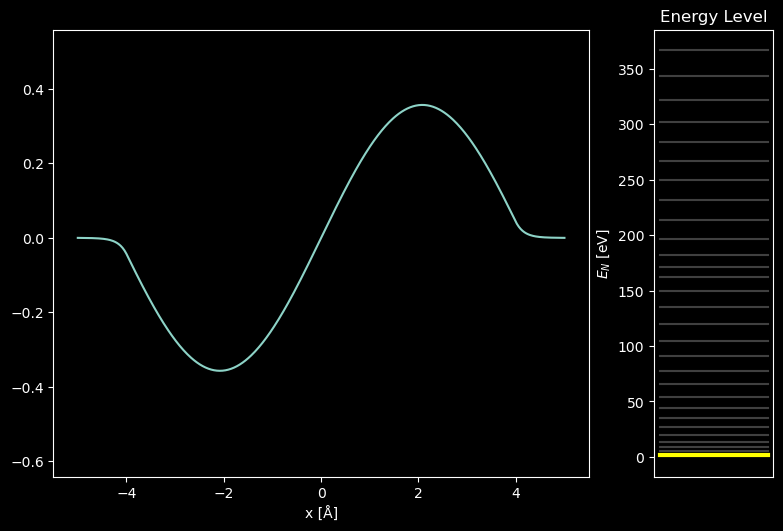

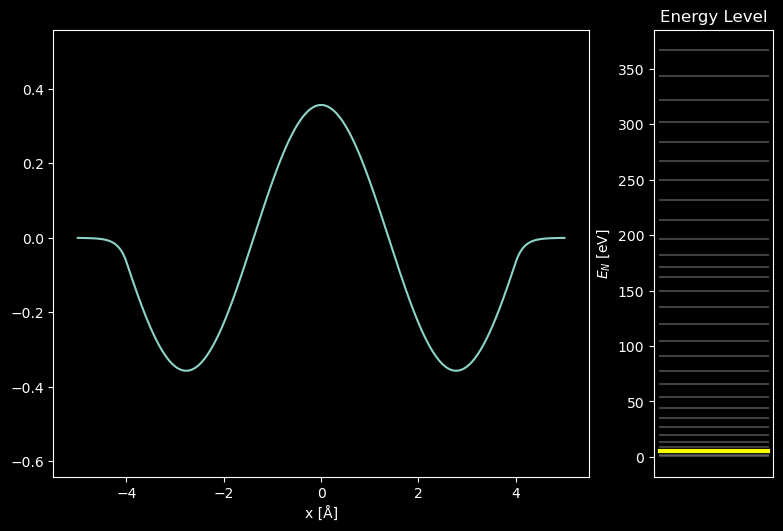

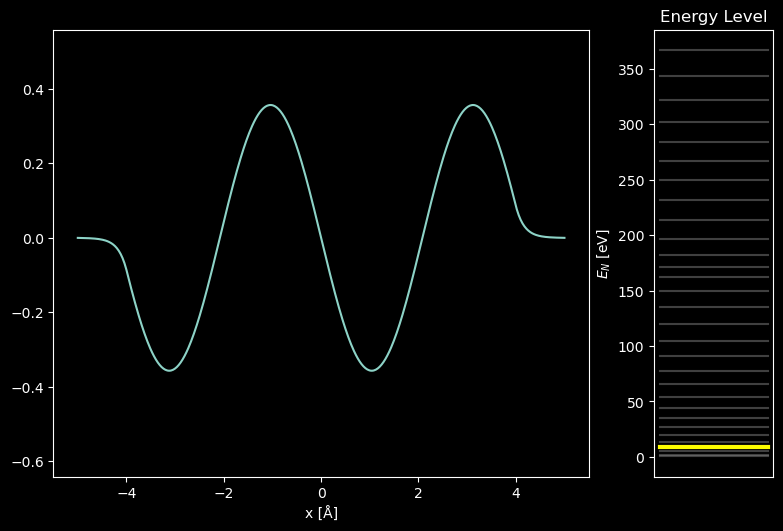

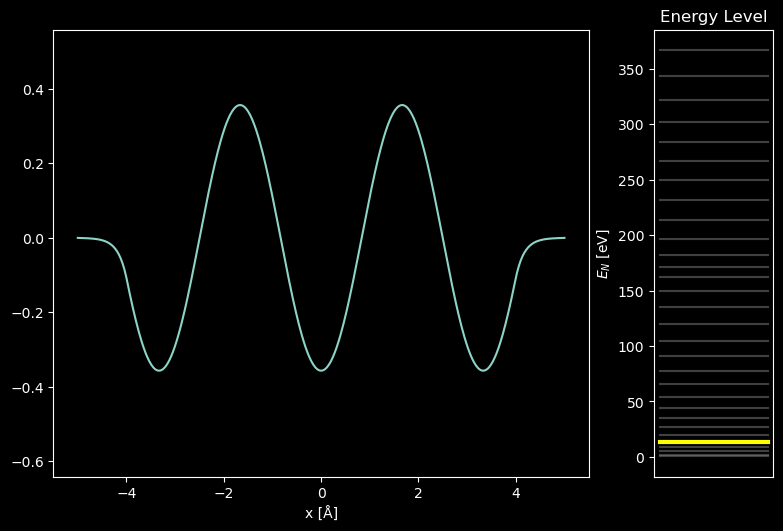

In [20]:
def finite_square(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = 5
    return potential

# Define the Hamiltonian of the finite square well
H_fw = Hamiltonian(particles = SingleParticle(), potential = finite_square,
spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates

eigenstates_fw = H_fw.solve(max_states = 30)
print(eigenstates_fw.energies)

# Visualize the infinite square well eigenstates

visualization_fw = init_visualization(eigenstates_fw)
visualization_fw.plot_eigenstate(0)
visualization_fw.plot_eigenstate(1)
visualization_fw.plot_eigenstate(2)
visualization_fw.plot_eigenstate(3)
visualization_fw.plot_eigenstate(4)

### Q11. Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number?

#### Based on my plots, the probability the particle can get out of the finite square-well potential is there, however it is very small. The quantum number doesn't seem to change this probability. 